### Titanic passenger analysis

In [1]:
import pandas as pd


In [28]:
passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()


,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- Are there more men or women survived?
- What kind of data is the `independent` variable?
- What kind of data is the `gender` (independent variable)?
    -`Nominal`

Two types ordinal and categorical:
- `Ordinal` data. Data that can be ordered.
- `Categorical/nominal` data that can not be ordered.

In [22]:
# Margins = True will show summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
contingency_table

Lived_Died,died,lived,All
Gender,,,
Female,143,339,482
Male,709,161,870
All,852,500,1352


Create a stacked bar plot showing the number of lived/ died aby gender

In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

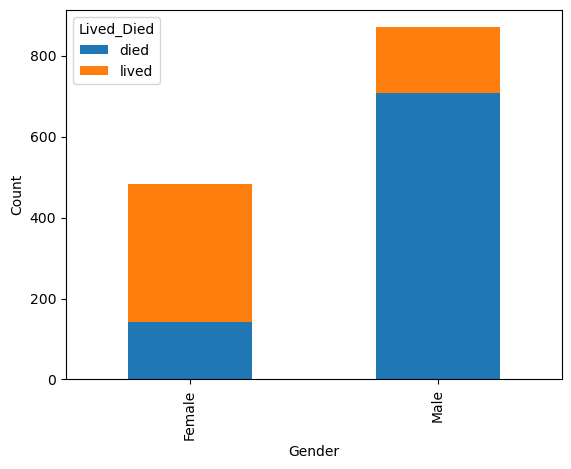

In [17]:
# Get count
# Exclude last column and row (summary info)
contingency_table.iloc[:-1,:-1].plot(kind='bar', stacked=True)
plt.ylabel('Count')

In [24]:
# stat analysis
from scipy import stats # for chi2_contingency
# without summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died']) 

print(stats.chi2_contingency(contingency_table)) #  excluding summary data
stats.chi2_contingency(contingency_table)[0:3] # to get only the stats values
# you get 3 values back:
# 1) Chi-Square (Higher the chi, less likelihood that the observed values were the result of the pure chance)
# 2) Target P-value
# 3) Degrees of freedom (r*rows - 1) * (r columns - 1) = 1


Chi2ContingencyResult(statistic=355.24355436145913, pvalue=3.0570688722545846e-79, dof=1, expected_freq=array([[303.74556213, 178.25443787],
       [548.25443787, 321.74556213]]))


## Chi-Square example: Was the age relevant?

In [29]:
# The age is at the time of accident '1912'
# Records with missing values will be 

print(passenger_df['Age'].max())
# The max age is 74.




74.0

In [30]:
# Let's assign missing values to 90
passenger_df['Age']=passenger_df['Age'].fillna(90)
passenger_df['Age'].isna().sum()

0

C:\Users\assse\AppData\Local\Temp\ipykernel_23632\3386158568.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


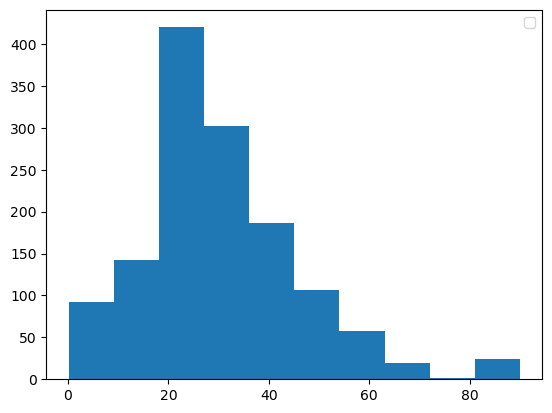

In [46]:

plt.hist(passenger_df['Age'], bins=10)
plt.legend()
plt.show()
# add columns for servived

In [44]:
#3 Create heatmap
passenger_df['age_bins']= pd.cut(x=passenger_df['Age'], bins = [0,10,20,30,40,50,60,70,80,90])

# Use a pivot table

TypeError: no numeric data to plot